# Handwritten Digits Recognition (0-9)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import linear, sigmoid, relu
from main import plt_samples, plt_pred_samples

### Dataset:
- 5000 training examples stored in X.npy and y.npy files in data folder
- Each X example is 20x20 grayscale image of digit
- Each y example is the corresponding digit label (0-9)
- No test set yet, so we will use the training set for testing as well

In [2]:
X = np.load("data/X.npy")
y = np.load("data/y.npy")

In [3]:
# Check shape of data
print(f"Training set X has shape {X.shape}")
print(f"Training set y has shape {y.shape}")

Training set X has shape (5000, 400)
Training set y has shape (5000, 1)


### Visualizing the data, to make sure training data's images and their corresponding labels are correct

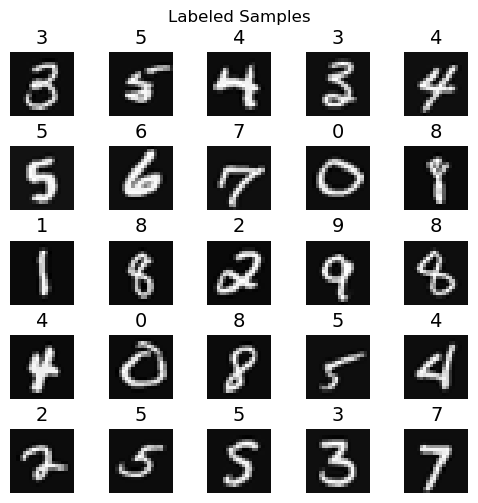

In [4]:
plt_samples(X,y)

In [5]:
model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=10, activation='linear') 
])

In [6]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
)

model.fit(X,y, epochs=50)

Epoch 1/50
157/157 [==============================] - 1s 3ms/step - loss: 1.5259
Epoch 2/50
157/157 [==============================] - 0s 3ms/step - loss: 0.5686
Epoch 3/50
157/157 [==============================] - 0s 3ms/step - loss: 0.3792
Epoch 4/50
157/157 [==============================] - 0s 3ms/step - loss: 0.3140
Epoch 5/50
157/157 [==============================] - 0s 3ms/step - loss: 0.2741
Epoch 6/50
157/157 [==============================] - 0s 3ms/step - loss: 0.2440
Epoch 7/50
157/157 [==============================] - 1s 4ms/step - loss: 0.2265
Epoch 8/50
157/157 [==============================] - 0s 3ms/step - loss: 0.2074
Epoch 9/50
157/157 [==============================] - 0s 3ms/step - loss: 0.1884
Epoch 10/50
157/157 [==============================] - 0s 3ms/step - loss: 0.1772
Epoch 11/50
157/157 [==============================] - 0s 3ms/step - loss: 0.1649
Epoch 12/50
157/157 [==============================] - 0s 3ms/step - loss: 0.1537
Epoch 13/50
157/157 [====

### Prediction sample

#### Predicting one test case

In [7]:
f_1 = model.predict(X[1].reshape(-1,400))
y_target = np.argmax(f_1)
print("Prediction | Label")
print(f"{y_target} | {int(y[1])}")

1/1 [==============================] - 0s 109ms/step
Prediction | Label
0 | 0


1/1 [==============================] - 0s 46ms/step


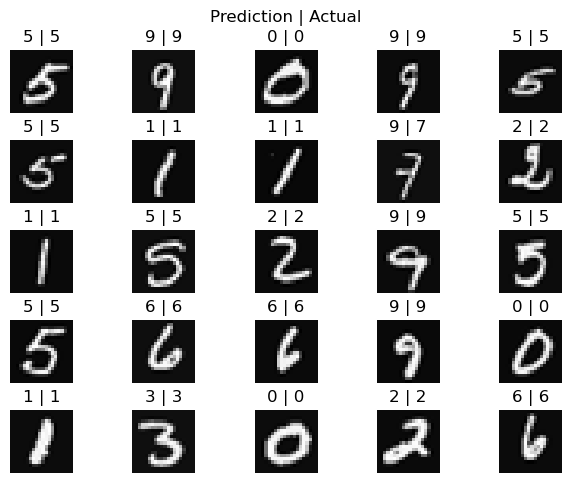

In [8]:
plt_pred_samples(X,y, model)

### Calculating Errors

In [9]:
from main import calculate_error
print(f"There are {calculate_error(X,y,model)} errors out of 5000 predictions!")

157/157 [==============================] - 0s 2ms/step
There are 2 errors out of 5000 predictions!


## Still in development:

- ##### Displaying Errors(Graph to display images of data wrongly predicted)